<!--NAVIGATION-->
< [什么是机器学习？](05.01-What-Is-Machine-Learning.ipynb) | [目录](Index.ipynb) | [超参数及模型验证](05.03-Hyperparameters-and-Model-Validation.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Introducing Scikit-Learn

# Scikit-Learn 简介

> There are several Python libraries which provide solid implementations of a range of machine learning algorithms.
One of the best known is [Scikit-Learn](http://scikit-learn.org), a package that provides efficient versions of a large number of common algorithms.
Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation.
A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

Python中有许多软件包提供了一系列的机器学习算法实现。其中最知名的是[Scikit-Learn](http://scikit-learn.org)，它提供了大量的通用算法的高效实现。Scikit-Learn提供了一套干净、统一和流式的API，还有非常实用及完整的在线文档。这种统一性的优点在于，一旦你理解了Scikit-Learn其中一种模型的基本使用方法和语法，再去使用另一种模型或算法的切换过程基本是无痛的。

> This section provides an overview of the Scikit-Learn API; a solid understanding of these API elements will form the foundation for understanding the deeper practical discussion of machine learning algorithms and approaches in the following chapters.

本节主要对Scikit-Learn的API进行总体介绍；对这些API的深入理解和掌握需要在后续的小节内容中使用更实际的例子来进行说明。

> We will start by covering *data representation* in Scikit-Learn, followed by covering the *Estimator* API, and finally go through a more interesting example of using these tools for exploring a set of images of hand-written digits.

我们首先从Scikit-Learn的*数据表示*开始介绍，接下来是*评估器*API，最后学习使用这些工具分析手写数字图像的数据集，这将会是一个更加有趣的例子帮助你来理解这些工具和概念。

## Data Representation in Scikit-Learn

## Scikit-Learn 的数据表示

> Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented in order to be understood by the computer.
The best way to think about data within Scikit-Learn is in terms of tables of data.

机器学习是有关从数据创建模型的技术：因此我们首先讨论数据是如何表示的，以方便被计算机理解。认识Scikit-Learn中的数据最好的方式是数据表。

### Data as table

### 数据表

> A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.
For example, consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.
We can download this dataset in the form of a Pandas ``DataFrame`` using the [seaborn](http://seaborn.pydata.org/) library:

基础的表是一个二维的数据网格，其中的行是数据集中每个独立的元素，而列是每个这些元素的属性值。例如我们之前使用过的[鸢尾花数据集](https://en.wikipedia.org/wiki/Iris_flower_data_set)，这个数据集于1936年被Ronald Fisher研究分析而闻名。我们可以使用[seaborn](http://seaborn.pydata.org/)来将这个数据集下载成一个Pandas的`DataFrame`：

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


> Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will refer to the rows of the matrix as *samples*, and the number of rows as ``n_samples``.

这个数据集中每一行都代表一朵独立观察的花，所以数据集的总行数就是观察到的花的总数量。总的来说，我们将这些行组成的矩阵称为*样本*，总行数被称为`n_samples`。

> Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as *features*, and the number of columns as ``n_features``.

同样的，数据集中的每一列都代表我们在每个样本中观测到的特征的数值信息。于是，我们将这些列组成的矩阵称为*特征*，总列数被称为`n_features`。

#### Features matrix

#### 特征矩阵

> This table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will call the *features matrix*.
By convention, this features matrix is often stored in a variable named ``X``.
The features matrix is assumed to be two-dimensional, with shape ``[n_samples, n_features]``, and is most often contained in a NumPy array or a Pandas ``DataFrame``, though some Scikit-Learn models also accept SciPy sparse matrices.

这样的表构造很清晰地表明信息是可以被想象成一个二维的数值数组或矩阵，也就是我们常说的*特征矩阵*。习惯上，特征矩阵通常被保存在变量`X`中。特征矩阵被认为是一个形状为`[n_samples, n_features]`的二维矩阵，而且一般都是保存在NumPy数组或者Pandas的`DataFrame`中，虽然一些Scikit-Learn模型也能接受SciPy稀疏矩阵作为输入。

> The samples (i.e., rows) always refer to the individual objects described by the dataset.
For example, the sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

这些样本（也就是行）永远指代数据集中的独立的对象。例如样本可以是花、人、文档、图像、声音文件、视频、天文物体或者任何你可以使用一组数值描述的物体。

> The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner.
Features are generally real-valued, but may be Boolean or discrete-valued in some cases.

这些特征（也就是列）永远指代每一个样本中的不同特征测量数据值。特征值通常是实数，在有些情况下也可能是布尔值或离散值。

#### Target array

#### 目标数组

> In addition to the feature matrix ``X``, we also generally work with a *label* or *target* array, which by convention we will usually call ``y``.
The target array is usually one dimensional, with length ``n_samples``, and is generally contained in a NumPy array or Pandas ``Series``.
The target array may have continuous numerical values, or discrete classes/labels.
While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, ``[n_samples, n_targets]`` target array, we will primarily be working with the common case of a one-dimensional target array.

除了特征矩阵`X`，我们也通常需要*标签*或*目标*数组，习惯上我们称它为`y`。目标数组一般是一维的，具有长度`n_samples`，一般保存在一个一维NumPy数组或者Pandas的`Series`中。目标数组可能具有连续的数值或者离散的分类或标签。虽然一些Scikit-Learn评估器也可以处理二维的多目标值，形状为`[n_samples, n_targets]`的数组，但是我们主要聚焦在一维目标数组的通常应用场景中。

> Often one point of confusion is how the target array differs from the other features columns. The distinguishing feature of the target array is that it is usually the quantity we want to *predict from the data*: in statistical terms, it is the dependent variable.
For example, in the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the ``species`` column would be considered the target array.

通常让人混淆的一点是目标数组与其他特征列的区别。目标数组的区别特性表现在于它们通常是我们希望用来*预测数据*的量：在统计学术语中，它被称为因变量。例如，我们希望从上面的数据中构造一个模型用来从新的测量数据中预测鸢尾花的种类；在这个情况下，`species`列可以被认为是目标数组。

> With this target array in mind, we can use Seaborn (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)) to conveniently visualize the data:

有了目标数组，我们可以使用Seaborn（参见[使用Seaborn进行可视化](04.14-Visualization-With-Seaborn.ipynb)）很方便地可视化数据：

译者注：下面代码中的size参数已经过时，已经改为height

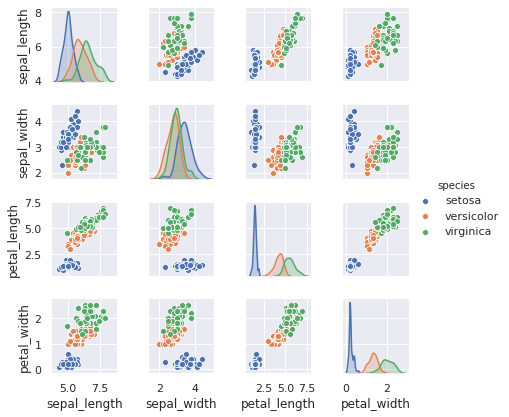

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5);

> For use in Scikit-Learn, we will extract the features matrix and target array from the ``DataFrame``, which we can do using some of the Pandas ``DataFrame`` operations discussed in the [Chapter 3](03.00-Introduction-to-Pandas.ipynb):

使用Scikit-Learn，我们可以从`DataFrame`中提取出特征矩阵和目标数组，我们可以使用一些我们在[第三章](03.00-Introduction-to-Pandas.ipynb)中介绍过的Pandas `DataFrame`技巧：

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

> To summarize, the expected layout of features and target values is visualized in the following diagram:

下面的图大致画出了上面生成的特征矩阵和目标向量的情况：

![](figures/05.02-samples-features.png)
[附录中生成图像的代码](06.00-Figure-Code.ipynb#Features-and-Labels-Grid)

> With this data properly formatted, we can move on to consider the *estimator* API of Scikit-Learn:

数据格式已经准备好了，我们可以继续学习Scikit-Learn的评估器API：

## Scikit-Learn's Estimator API

## Scikit-Learn 评估器 API

> The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the [Scikit-Learn API paper](http://arxiv.org/abs/1309.0238):

> - *Consistency*: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

> - *Inspection*: All specified parameter values are exposed as public attributes.

> - *Limited object hierarchy*: Only algorithms are represented by Python classes; datasets are represented
  in standard formats (NumPy arrays, Pandas ``DataFrame``s, SciPy sparse matrices) and parameter
  names use standard Python strings.

> - *Composition*: Many machine learning tasks can be expressed as sequences of more fundamental algorithms,
  and Scikit-Learn makes use of this wherever possible.

> - *Sensible defaults*: When models require user-specified parameters, the library defines an appropriate default value.

Scikit-Learn API被设计成具有下述的指导原则，它们在[Scikit-Learn API文档](http://arxiv.org/abs/1309.0238)中有说明：

- *一致性*：所有对象都共享一个公共的接口，从少量的一组方法中衍生出来，有着一致的文档。
- *有限的对象层次*：只有算法被表达为Python类；数据集表示为标准格式（NumPy数组，Pandas `DataFrame`，SciPy稀疏矩阵），参数名称使用的是标准Python字符串。
- *组合*：许多机器学习任务可以被表达为一系列的更基础算法，Scikit-Learn在任何可能的地方都可以组合使用它们。
- *明智的默认值*：当模型需要用户指定的参数时，软件包预定义了合适的默认值。

> In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood.
Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

在实践中，这些原则令Scikit-Learn非常易于使用，一旦理解了基本的原则。Scikit-Learn中每个机器学习算法都是通过评估器API实现的，它为大范围的机器学习应用场景提供了一整套一致性的接口。

### Basics of the API

### API 基础

> Most commonly, the steps in using the Scikit-Learn estimator API are as follows
(we will step through a handful of detailed examples in the sections that follow).

> 1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
> 2. Choose model hyperparameters by instantiating this class with desired values.
> 3. Arrange data into a features matrix and target vector following the discussion above.
> 4. Fit the model to your data by calling the ``fit()`` method of the model instance.
> 5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.
   
最通常的情况下，你可以依照下面的步骤来使用Scikit-Learn评估器API（我们后面会按照这些步骤运行许多详细的例子）。

1. 通过载入合适的Scikit-Learn评估器类选择一个模型的类型。
2. 通过使用需要的值作为模型的超参数来实例化模型对象。
3. 按照上面的方式将数据分为特征矩阵和目标向量。
4. 通过调用模型实例的`fit()`方法将你的模型与数据进行拟合。
5. 将拟合后的模型应用在新的数据上：
    - 对于有监督学习，通常我们使用`predict()`方法来预测未知数据的标签。
    - 对于无监督学习，通常我们使用`transform()`方法来转换或推断数据的属性。

> We will now step through several simple examples of applying supervised and unsupervised learning methods.

下面我们通过几个简单的例子来简单说明有监督和无监督学习方法的应用。

### Supervised learning example: Simple linear regression

### 有监督学习例子：简单线性回归

> As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to $(x, y)$ data.
We will use the following simple data for our regression example:

作为第一个例子，让我们考虑简单的线性回归，也就是最常见的将一根直线拟合到$(x, y)$数据上。我们使用下面简单的数据来作为回归的例子：

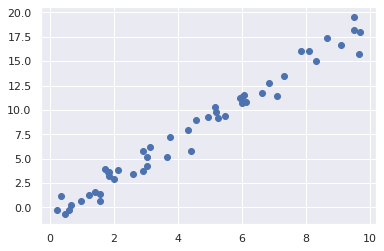

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

> With this data in place, we can use the recipe outlined earlier. Let's walk through the process: 

有了数据之后，我们就可以按照刚才的步骤来实现回归。下面我们一步一步的来操作：

#### 1. Choose a class of model

#### 1. 选择模型类型

> In Scikit-Learn, every class of model is represented by a Python class.
So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class:

在Scikit-Learn中，每个模型类型都是一个Python类。因此如果我们希望计算简单的线性回归模型，我们可以载入线性回归类：

In [6]:
from sklearn.linear_model import LinearRegression

> Note that other more general linear regression models exist as well; you can read more about them in the [``sklearn.linear_model`` module documentation](http://Scikit-Learn.org/stable/modules/linear_model.html).

注意还有更多通用的线性回归模型；你可以在[`sklearn.linear_model` 模块的在线文档](http://Scikit-Learn.org/stable/modules/linear_model.html)中学到更多的内容。

#### 2. Choose model hyperparameters

#### 2. 选择模型超参数

> An important point is that *a class of model is not the same as an instance of a model*.

要记住的一个重要的点是*一个模型的类别与一个模型的实例不是同一个东西*。

> Once we have decided on our model class, there are still some options open to us.
Depending on the model class we are working with, we might need to answer one or more questions like the following:

> - Would we like to fit for the offset (i.e., *y*-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

我们决定了我们模型类别之后，还有一些参数可以进行选择。取决于我们选择的模型类别，我们可能需要回下面一个或多个问题：

- 我们需要拟合偏移（例如y截距）吗？
- 我们需要模型归一化吗？
- 我们需要预处理特征来增加模型的灵活性吗？
- 在我们的模型中正则化的角度是多少？
- 我们想要使用多少个模型的组件？

> These are examples of the important choices that must be made *once the model class is selected*.
These choices are often represented as *hyperparameters*, or parameters that must be set before the model is fit to data.
In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.
We will explore how you can quantitatively motivate the choice of hyperparameters in [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb).

一旦模型类别选定后，上面列出的都是一些重要的选择。这些选择通常被称为*超参数*，或者解释为在模型拟合数据前被设置的参数。在Scikit-Learn中，超参数通过向模型实例传递参数值来设置。我们会在[超参数和模型验证](05.03-Hyperparameters-and-Model-Validation.ipynb)一节中深入讨论如何定量调整这些超参数的值。

> For our linear regression example, we can instantiate the ``LinearRegression`` class and specify that we would like to fit the intercept using the ``fit_intercept`` hyperparameter:

对于我们线性回归例子来说，我们可以实例化`LinearRegression`类并且使用`fit_intercept`参数来设置你是否希望拟合截距值：

In [7]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

> Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values.
In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between *choice of model* and *application of model to data*.

记住当模型被实例化后，唯一的动作就是保存了超参数的值。也就是说我们还未将模型应用到任何数据上：Scikit-Learn API将*模型选择*和*将模型应用在数据上*区分的很清楚。

#### 3. Arrange data into a features matrix and target vector

#### 3. 将数据组合成特征矩阵和目标向量

> Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array.
Here our target variable ``y`` is already in the correct form (a length-``n_samples`` array), but we need to massage the data ``x`` to make it a matrix of size ``[n_samples, n_features]``.
In this case, this amounts to a simple reshaping of the one-dimensional array:

前面我们详细介绍了Scikit-Learn数据表示，它需要一个二维的特征矩阵和一个一维的目标数组。这里我们的目标变量`y`已经是正确格式了（长度为`n_samples`的数组），但是我们需要将数据`x`变成一个形状为`[n_samples, n_features]`的矩阵。在这个情况下，我们需要将一个一维数组进行变形：

In [8]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Fit the model to your data

#### 4. 将模型拟合数据

> Now it is time to apply our model to data.
This can be done with the ``fit()`` method of the model:

现在是时候将我们的模型应用在数据上了。这可以通过模型的`fit()`方法实现：

In [9]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

> This ``fit()`` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.
In Scikit-Learn, by convention all model parameters that were learned during the ``fit()`` process have trailing underscores; for example in this linear model, we have the following:

执行`fit()`方法会导致一系列的模型内部计算，计算得到的结果会保存在模型对象的属性上，用户可以查看它们。在Scikit-Learn中习惯上所有通过`fit()`过程学习得到的模型参数都有下划线后缀；例如在这个线性模型中，我们有下面的属性：

In [10]:
model.coef_

array([1.9776566])

In [11]:
model.intercept_

-0.9033107255311164

> These two parameters represent the slope and intercept of the simple linear fit to the data.
Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

这两个参数代表着我们拟合数据后得到的斜率和截距。回想我们的数据定义，我们很容易看出它们很接近输入的斜率2和截距-1.

> One question that frequently comes up regards the uncertainty in such internal model parameters.
In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters is much more a *statistical modeling* question than a *machine learning* question.
Machine learning rather focuses on what the model *predicts*.
If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the [Statsmodels Python package](http://statsmodels.sourceforge.net/).

一个经常被提到的问题就是关于这样的模型内部参数的不确定性。通常来说，Scikit-Learn不提供工具来对内部模型参数本身进行概括：解释模型参数更多是一个*统计模型*问题而非一个*机器学习*问题。机器学习更加聚焦的是模型*预测*的内容。如果你希望深入了解模型拟合参数的含义，可以使用别的工具，包括[统计模型 Python 包](http://statsmodels.sourceforge.net/)。

#### 5. Predict labels for unknown data

#### 5. 对未知数据进行预测

> Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In Scikit-Learn, this can be done using the ``predict()`` method.
For the sake of this example, our "new data" will be a grid of *x* values, and we will ask what *y* values the model predicts:

一旦模型训练好了，有监督机器学习的主要任务就是用它来评估不属于训练集的数据结果。在Scikit-Learn中，可以通过`predict()`方法来实现。在这个例子中，我们的“新数据”是一个*x*值的网格，我们使用模型来预测出相应的*y*值：

In [12]:
xfit = np.linspace(-1, 11)

> As before, we need to coerce these *x* values into a ``[n_samples, n_features]`` features matrix, after which we can feed it to the model:

如前所述，我们需要将这个x向量转变成一个`[n_samples, n_features]`的特征矩阵，然后才能使用模型进行预测：

In [13]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

> Finally, let's visualize the results by plotting first the raw data, and then this model fit:

最后，让我们在图表中画出原始数据的散点和新数据的直线：

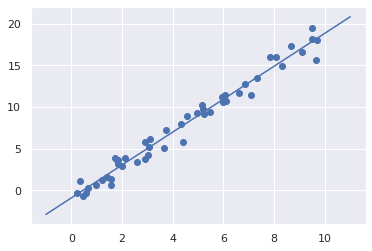

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

> Typically the efficacy of the model is evaluated by comparing its results to some known baseline, as we will see in the next example

模型的性能可以通过对结果和已知的基线进行比较来评估，我们会在下一个例子中看到。

### Supervised learning example: Iris classification

### 有监督学习例子：鸢尾花分类

> Let's take a look at another example of this process, using the Iris dataset we discussed earlier.
Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

让我们再通过一个例子来介绍这个过程，本例中我们使用前面的鸢尾花数据集。我们的问题是：给定鸢尾花数据集的一部分用来训练模型，我们能多好的预测剩余数据的标签？

> For this task, we will use an extremely simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution (see [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb) for more details).
Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

对于这个任务来说，我们会使用一个极端简单的生成模型，称为高斯朴素贝叶斯模型，它的算法思想就是假设每个分类都可以从轴对齐的高斯分布获得（参见[深入：朴素贝叶斯分类](05.05-Naive-Bayes.ipynb)）。这个模型速度极快并且没有需要选择的超参数，因此高斯朴素贝叶斯经常可以用来作为一个基准分类模型，在我们使用更复杂的模型进行性能优化之前优先使用它。

> We would like to evaluate the model on data it has not seen before, and so we will split the data into a *training set* and a *testing set*.
This could be done by hand, but it is more convenient to use the ``train_test_split`` utility function:

我们希望通过模型没有训练到的数据对它的性能进行评估，因此我们需要将数据分为*训练集*和*测试集*。这可以通过手工完成，还可以使用`train_test_split`工具函数很方便的实现：

译者注：下面代码将过时的cross_validation修改为model_selection

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

> With the data arranged, we can follow our recipe to predict the labels:

数据准备好后，我们可以依照步骤对测试集数据的标签进行预测：

In [16]:
from sklearn.naive_bayes import GaussianNB # 1. 选择模型类别
model = GaussianNB()                       # 2. 实例化模型
model.fit(Xtrain, ytrain)                  # 3. 拟合数据
y_model = model.predict(Xtest)             # 4. 预测新数据

> Finally, we can use the ``accuracy_score`` utility to see the fraction of predicted labels that match their true value:

最后，我们可以通过`accuracy_score`工具来查看有多少比例的标签我们是预测正确的：

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

> With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset!

准确率高达97%，可以看到对于这个数据集来说即使如此简单的分类算法也可以非常有效。

### Unsupervised learning example: Iris dimensionality

### 无监督学习例子：鸢尾花数据集降维

> As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it.
Recall that the Iris data is four dimensional: there are four features recorded for each sample.

作为无监督学习问题的例子，我们来看一下对鸢尾花数据集进行降维处理令它们更容易可视化。我们都已经知道鸢尾花数据集有四个维度：也就是每个样本都记录了四个特征的数据。

> The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data.
Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

降维的任务是找出是否有一种合适的低纬度数据表示能基本保留了数据的关键特征。通常降维都被用来帮助数据可视化：毕竟在二维数据上作图肯定比在四维甚至更高维度上作图容易的多。

> Here we will use principal component analysis (PCA; see [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb)), which is a fast linear dimensionality reduction technique.
We will ask the model to return two components—that is, a two-dimensional representation of the data.

这里我们会使用主成分分析（PCA；参见[深入：主成分分析](05.09-Principal-Component-Analysis.ipynb)），它是一个快速的线性降维方法。我们会要求模型返回两个组成部分，即数据的二维表示。

> Following the sequence of steps outlined earlier, we have:

依照前面介绍的步骤，我们可以：

In [18]:
from sklearn.decomposition import PCA  # 1. 选择模型类别
model = PCA(n_components=2)            # 2. 实例化模型，设置超参数
model.fit(X_iris)                      # 3. 拟合数据，注意这里没有y参数
X_2D = model.transform(X_iris)         # 4. 将数据转换为二维

> Now let's plot the results. A quick way to do this is to insert the results into the original Iris ``DataFrame``, and use Seaborn's ``lmplot`` to show the results:

下面绘制结果。最简单的方式是将结果作为列插入回原始的鸢尾花`DataFrame`，然后使用Seaborn的`lmplot`来展示结果：

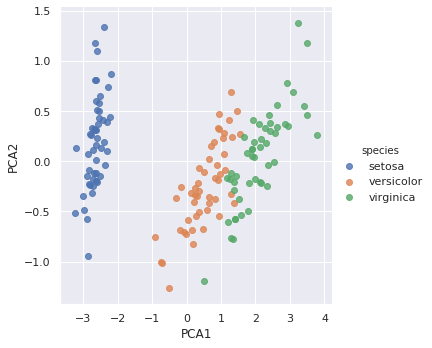

In [19]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

> We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels!
This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

我们发现在二维数据表示中，花的种类也是很容易分开的，即使在PCA算法对于种类标签根本没有了解。这也体现了这个数据集可以相对直接的进行分类，就像前面看到的那样。

### Unsupervised learning: Iris clustering

### 无监督学习：鸢尾花数据集聚类

> Let's next look at applying clustering to the Iris data.
A clustering algorithm attempts to find distinct groups of data without reference to any labels.
Here we will use a powerful clustering method called a Gaussian mixture model (GMM), discussed in more detail in [In Depth: Gaussian Mixture Models](05.12-Gaussian-Mixtures.ipynb).
A GMM attempts to model the data as a collection of Gaussian blobs.

下面我们来看看将聚类算法应用在鸢尾花数据集上的情况。聚类算法试图在没有任何标签的数据集中找出不同的分组。下面我们会使用一个强大的聚类方法称为高斯混合模型（GMM），我们会在[深入：高斯混合模型](05.12-Gaussian-Mixtures.ipynb)中详细介绍它。GMM试图将数据看成是一组高斯族群。

> We can fit the Gaussian mixture model as follows:

我们可以如下拟合高斯混合模型：

译者注：GMM因为过时，下面代码已修改为GaussianMixture

In [20]:
from sklearn.mixture import GaussianMixture      # 1. 选择模型类型
model = GaussianMixture(n_components=3,
            covariance_type='full')  # 2. 实例化模型，设置超参数
model.fit(X_iris)                    # 3. 拟合数据，注意y没有设置
y_gmm = model.predict(X_iris)        # 4. 预测值

> As before, we will add the cluster label to the Iris ``DataFrame`` and use Seaborn to plot the results:

想之前一样，我们会给鸢尾花`DataFrame`添加聚类列，然后使用Seaborn绘制结果：

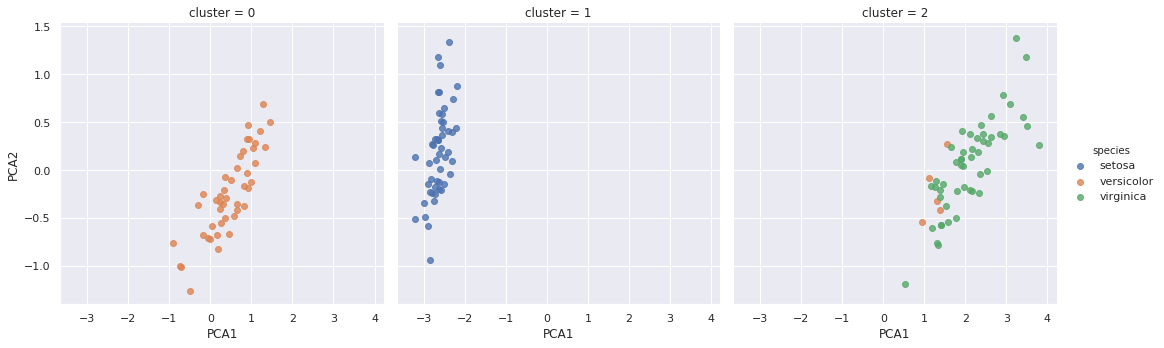

In [21]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

> By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying label: the *setosa* species is separated perfectly within cluster 0, while there remains a small amount of mixing between *versicolor* and *virginica*.
This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could *automatically* identify the presence of these different groups of species with a simple clustering algorithm!
This sort of algorithm might further give experts in the field clues as to the relationship between the samples they are observing.

使用聚类编号将数据分开，我们可以清楚的看到GMM算法运行的多么良好：*setosa*种类被完美地分到了群组0，剩下的*versicolor*和*virginica*有一点混在一起，但是也比较准确。这意味着即使在没有专家告诉我们如何区分不同种类的花的情况下，我们也可以使用计算机*自动*根据聚类算法将它们区分出来。这种算法还可以为专家提供他们观测的样本之间联系的线索。

## Application: Exploring Hand-written Digits

## 应用：分析手写数字

> To demonstrate these principles on a more interesting problem, let's consider one piece of the optical character recognition problem: the identification of hand-written digits.
In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use Scikit-Learn's set of pre-formatted digits, which is built into the library.

下面我们要在一个更加有趣的问题中展示这些方法，考虑一个图像识别的问题：手写数字的自动识别。正常情况下，这个问题包括了定位和识别图像中的字母。这里我们抄了一个捷径，使用Scikit-Learn自带的预处理过的图像。

### Loading and visualizing the digits data

### 载入和展示数字图像

> We'll use Scikit-Learn's data access interface and take a look at this data:

我们使用Scikit-Learn的数据访问接口来载入这些图像并且查看一下数据内容：

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

> The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.
Let's visualize the first hundred of these:

图像数据是三维数组：1797个样本每个包括8 × 8像素的图。我们可以展示头100张：

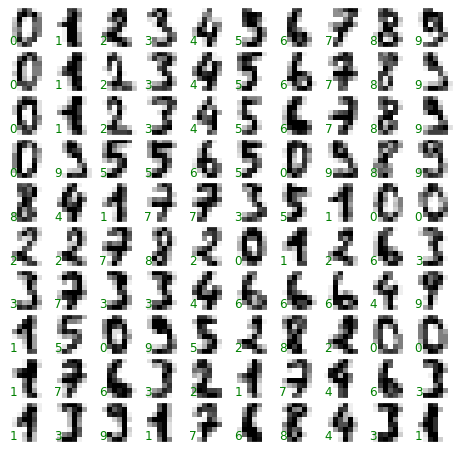

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

> In order to work with this data within Scikit-Learn, we need a two-dimensional, ``[n_samples, n_features]`` representation.
We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit.
Additionally, we need the target array, which gives the previously determined label for each digit.
These two quantities are built into the digits dataset under the ``data`` and ``target`` attributes, respectively:

为了要在Scikit-Learn中使用这个数据集，我们需要一个二维的`[n_samples, n_features]`数据表示。在本例中我们可以将图像中的每个像素点当成一个特征：也就是说，通过将每个图像的像素数组平铺展开成一个长度为64的一维数组。除此之外，我们还需要目标数组，如上图一样是每张图标记的数字组成的数组。这两个量已经在数据集中內建好了，分别叫做`data`和`target`属性：

In [24]:
X = digits.data
X.shape

(1797, 64)

In [25]:
y = digits.target
y.shape

(1797,)

> We see here that there are 1,797 samples and 64 features.

我们看到一共有1797个样本和64个特征。

### Unsupervised learning: Dimensionality reduction

### 无监督学习：降维

> We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to effectively visualize points in such a high-dimensional space.
Instead we'll reduce the dimensions to 2, using an unsupervised method.
Here, we'll make use of a manifold learning algorithm called *Isomap* (see [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb)), and transform the data to two dimensions:

我们希望能够将我们的点在一个64维的参数空间中可视化出来，但是在这么高的维度上有效的可视化是非常困难的。所以我们转而使用无监督方法将维度减至二维。这里我们使用的是流形学习算法*Isomap*（参见[深入: 流形学习](05.10-Manifold-Learning.ipynb)），然后将数据转换成二维：

In [26]:
from sklearn.manifold import Isomap # 选择模型类别
iso = Isomap(n_components=2) # 实例化模型，设置超参数
iso.fit(digits.data) # 拟合数据，这里也没有y参数
data_projected = iso.transform(digits.data) # 转换数据到二维
data_projected.shape

(1797, 2)

> We see that the projected data is now two-dimensional.
Let's plot this data to see if we can learn anything from its structure:

我们看到映射后的数据现在是二维的了。下面我们把降维后的数据绘制出来看我们学习的成果：

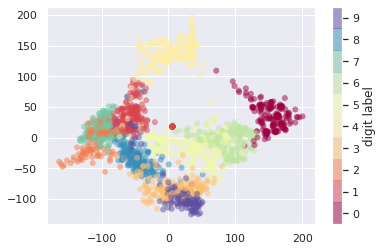

In [27]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

> This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space. For example, zeros (in black) and ones (in purple) have very little overlap in parameter space.
Intuitively, this makes sense: a zero is empty in the middle of the image, while a one will generally have ink in the middle.
On the other hand, there seems to be a more or less continuous spectrum between ones and fours: we can understand this by realizing that some people draw ones with "hats" on them, which cause them to look similar to fours.

上图给我们展现了数据集在高维度-64维空间很直观的分布情况展示。例如数字0和1在特征矩阵空间很少重叠。这很容易理解：0在图像中间有个空白区域，而1中间没有空白区域。另一方面，数字1和4几乎有着很连续的图谱：当我们一直到一些人写数字1时会加上“帽子”时，这就容易理解了，这回造成两者看起来很相似。

> Overall, however, the different groups appear to be fairly well separated in the parameter space: this tells us that even a very straightforward supervised classification algorithm should perform suitably on this data.
Let's give it a try.

大体来说，上图说明不同的数字在它们的特征矩阵空间中都能较好的区分开：这表示即使是一个很直接简单的有监督分类算法应该也能适合分类这个数据集。让我们试一试。

### Classification on digits

### 数字分类

> Let's apply a classification algorithm to the digits.
As with the Iris data previously, we will split the data into a training and testing set, and fit a Gaussian naive Bayes model:

下面我们在手写数字上应用分类算法。就像前面鸢尾花数据那样，我们将数据集分为训练集和测试集，然后将这些训练数据拟合到高斯朴素贝叶斯模型中：

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

> Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:

我们已经预测了我们的模型，我们可以将得到的预测结果和测试集的目标向量进行比较得到模型的准确率：

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

With even this extremely simple model, we find about 80% accuracy for classification of the digits!
However, this single number doesn't tell us *where* we've gone wrong—one nice way to do this is to use the *confusion matrix*, which we can compute with Scikit-Learn and plot with Seaborn:

使用这个非常简单的模型，我们得到了大约80%的数字分类的准确率。然而这个数字并不能告诉我们*哪里*出错了，输出*混淆矩阵*是一个好办法，可以使用Scikit-Learn计算它并使用Seaborn绘制图表：

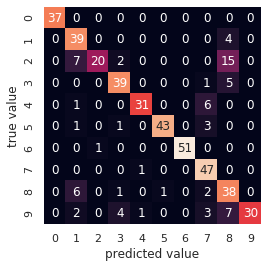

In [31]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

> This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights.
Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels.
We'll use green for correct labels, and red for incorrect labels:

上图为我们展示了哪些数字更容易被错误标记：例如比较多的数字2被错误分类到了数字1或数字8。另一种直观展示模型准确率的方法是绘制输入的数字图像，还有它们预测的标签。我们使用绿色展示预测正确的标签，红色展示错误的标签：

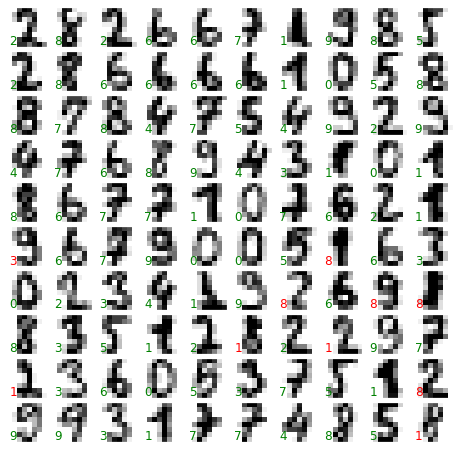

In [32]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

> Examining this subset of the data, we can gain insight regarding where the algorithm might be not performing optimally.
To go beyond our 80% classification rate, we might move to a more sophisticated algorithm such as support vector machines (see [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)), random forests (see [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb)) or another classification approach.

通过检查这个数据子集，我们也能获得算法在什么情况下变现的不尽人意。要获得超越80%分类准确率，我们需要转向更复杂的算法例如支持向量机（参见[深入：支持向量机](05.07-Support-Vector-Machines.ipynb)）、随机森林（参见[深入：随机森林](05.08-Random-Forests.ipynb)）或其他分类方法。

## Summary

## 总结

> In this section we have covered the essential features of the Scikit-Learn data representation, and the estimator API.
Regardless of the type of estimator, the same import/instantiate/fit/predict pattern holds.
Armed with this information about the estimator API, you can explore the Scikit-Learn documentation and begin trying out various models on your data.

在本节中我们介绍了Scikit-Learn数据表示方式和评估器API的基本概念和使用方法。无论使用哪种评估器，载入/实例化/拟合/预测这些步骤都是一样的。掌握了评估器API这些信息后，你可以自己阅读Scikit-Learn文档以及开始在数据上尝试使用不同的模型。

> In the next section, we will explore perhaps the most important topic in machine learning: how to select and validate your model.

在下一节中，我们会讨论也许是本章机器学习中最重要的课题：如何选择和验证你的模型。

<!--NAVIGATION-->
< [什么是机器学习？](05.01-What-Is-Machine-Learning.ipynb) | [目录](Index.ipynb) | [超参数及模型验证](05.03-Hyperparameters-and-Model-Validation.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
